In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
import csv
import datetime
import scipy.stats as sts
from pandas import Series, DataFrame

In [10]:
###CSV file pull
file =('Mttowncsv.csv')
api_key = 'ca33c56d4eff48c4956c1a49af8eefce'


In [11]:
### Cleaning CSV file

mt_df = pd.read_csv(file, sep=',')
mt_df1=mt_df.set_index("Day Date")
mt_df1=mt_df
mt_df2 =mt_df1[["Day Date", "Center Name","Driver Work Center Hrs Qty","Deliv Stops Qty"]]
mt_df3 =mt_df2.rename(columns={
    "Day Date": "Date",
    "Center Name":"Mountain Town",
    "Driver Work Center Hrs Qty":"Total Hours Worked",
   "Deliv Stops Qty": "Stops Made"
                      })
mt_df3


,Date,Mountain Town,Total Hours Worked,Stops Made
0,12/31/2018,Mountain 1,123.79,977
1,12/31/2018,Mountain 2,106.93,946
2,12/31/2018,Mountain 3,138.42,1277
3,1/1/2019,Mountain 1,0.00,0
4,1/1/2019,Mountain 2,0.00,0
...,...,...,...,...
1198,2/3/2020,Mountain 2,168.52,2144
1199,2/3/2020,Mountain 3,255.49,3329
1200,2/4/2020,Mountain 1,261.42,2430
1201,2/4/2020,Mountain 2,154.96,1957


In [12]:
### Cleaning CSV file####


#mt_df6 = pd.to_datetime(mt_df4['Date'])
mt_df6 =mt_df3.astype({'Date': 'datetime64'})
mt_df7 =mt_df6.set_index("Date")  
mt_df8=mt_df7.loc['1/1/2019':'12/31/2019']  


mt_df8['Stops Per Hour Worked'] = mt_df8['Stops Made'] / mt_df8['Total Hours Worked']
mt_df8

C:\Users\13038\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Mountain Town,Total Hours Worked,Stops Made,Stops Per Hour Worked
Date,,,,
2019-01-01,Mountain 1,0.00,0,NaN
2019-01-01,Mountain 2,0.00,0,NaN
2019-01-01,Mountain 3,0.00,0,NaN
2019-01-02,Mountain 1,287.69,2767,9.617992
2019-01-02,Mountain 2,201.27,2118,10.523178
...,...,...,...,...
2019-12-30,Mountain 2,277.09,3109,11.220181
2019-12-30,Mountain 3,422.67,5070,11.995174
2019-12-31,Mountain 1,165.55,1346,8.130474


In [13]:
####Test API call #####
#base_url = 'https://api.weatherbit.io/v2.0/history/daily?postal_code='
#postal_code = '80497'
#start = '2019-01-25'
#end = '2019-01-26'
#call = base_url + postal_code + "&country=US&start_date=" + start + '&end_date=' + end + '&units=M' + '&key=' + api_key
#call

In [14]:
#List storing 2019 dates - for loop
date_list=pd.period_range('2019', freq='D', periods=365)

date_list

PeriodIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
             '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
             '2019-01-09', '2019-01-10',
             ...
             '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25',
             '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29',
             '2019-12-30', '2019-12-31'],
            dtype='period[D]', length=365, freq='D')

In [15]:
#call = (f'{base_url}{postal_code}&country=US&start_date={start}&end_date={end}&key={api_key}')
#weather_response = requests.get(call)
#weather_json = weather_response.json()
#weather_json['data'][0]['temp']

In [16]:
#empty list to store API call info
temp = []
snow = []
datetime = []
snow_depth = []
precip = []


In [17]:

counter = 0
for day in date_list:
    counter +=1
    if counter == 365:
        break
    base_url = 'https://api.weatherbit.io/v2.0/history/daily?postal_code='
    postal_code = '80497'
    start = day
    end = date_list[counter]
    #call = base_url + postal_code + "&country=US&start_date=" + start + '&end_date=' + end + '&key=' + api_key
    base_url = 'https://api.weatherbit.io/v2.0/history/daily?postal_code='
    postal_code = '80497'
    call = (f'{base_url}{postal_code}&country=US&start_date={start}&end_date={end}&units=I&key={api_key}')

    weather_response = requests.get(call)
    weather_json = weather_response.json()
    
    
    
    # need to append list here
    temp.append(weather_json['data'][0]['temp'])
    snow.append(weather_json['data'][0]['snow'])
    datetime.append(weather_json['data'][0]['datetime'])
    snow_depth.append(weather_json['data'][0]['snow_depth'])
    precip.append(weather_json['data'][0]['precip'])
    
print('Done')


Done


In [18]:
weather_dict = {
    'Date':datetime,
    'Snow': snow,
    'Temp': temp,
    "Snow Depth": snow_depth,
    "Precip": precip
    
}
weather_df = pd.DataFrame(weather_dict)
weather_df1 =  weather_df.astype({'Date': 'datetime64'})
weather_df1["DOW#"]=weather_df1['Date'].dt.weekday
weather_df2 = weather_df1.set_index("Date")
weather_df2
DOW = []
for day in weather_df1['DOW#']:
    if day == 6:
        DOW.append("Sunday")
    if day == 0:
        DOW.append("Monday")
    if day == 1:
        DOW.append("Tuesday")
    if day == 2:
        DOW.append("Wednesday")
    if day == 3:
        DOW.append("Thurdsay")
    if day == 4:
        DOW.append("Friday")
    if day == 5:
        DOW.append("Saturday")
weather_df2['DOW']= DOW
weather_df2

,Snow,Temp,Snow Depth,Precip,DOW#,DOW
Date,,,,,,
2019-01-01,0.177,9.3,None,0.012,1,Tuesday
2019-01-02,0.000,17.8,None,0.000,2,Wednesday
2019-01-03,0.000,23.4,None,0.000,3,Thurdsay
2019-01-04,0.000,30.4,None,0.000,4,Friday
2019-01-05,0.024,34.2,None,0.012,5,Saturday
...,...,...,...,...,...,...
2019-12-26,0.177,7.7,None,0.012,3,Thurdsay
2019-12-27,0.650,13.5,None,0.043,4,Friday
2019-12-28,1.122,9.0,None,0.075,5,Saturday


In [19]:
# merge 2 del and weather data frame
mt_merged_df = mt_df8.merge(weather_df2, left_index=True, right_index=True)
mt_merged_df

,Mountain Town,Total Hours Worked,Stops Made,Stops Per Hour Worked,Snow,Temp,Snow Depth,Precip,DOW#,DOW
Date,,,,,,,,,,
2019-01-01,Mountain 1,0.00,0,NaN,0.177,9.3,None,0.012,1,Tuesday
2019-01-01,Mountain 2,0.00,0,NaN,0.177,9.3,None,0.012,1,Tuesday
2019-01-01,Mountain 3,0.00,0,NaN,0.177,9.3,None,0.012,1,Tuesday
2019-01-02,Mountain 1,287.69,2767,9.617992,0.000,17.8,None,0.000,2,Wednesday
2019-01-02,Mountain 2,201.27,2118,10.523178,0.000,17.8,None,0.000,2,Wednesday
...,...,...,...,...,...,...,...,...,...,...
2019-12-29,Mountain 2,0.00,0,NaN,0.000,-2.0,None,0.000,6,Sunday
2019-12-29,Mountain 3,0.00,0,NaN,0.000,-2.0,None,0.000,6,Sunday
2019-12-30,Mountain 1,376.38,3952,10.500027,0.000,-7.6,None,0.000,0,Monday


In [130]:
co_mt_df=mt_merged_df.replace(["Mountain 1"], "SilverThorne")

snow_day =  []

for x in co_mt_df['Snow']:
    if x > 6:
        snow_day.append("Heavy")
    elif x > 2:
        snow_day.append("Med")
    elif x > 0:
        snow_day.append("Light")
    else:
        snow_day.append("None")
        
co_mt_df['Snow Day'] = snow_day
co_mt_df1= co_mt_df.loc[co_mt_df['Mountain Town'] =='SilverThorne']
co_mt_df1

,Mountain Town,Total Hours Worked,Stops Made,Stops Per Hour Worked,Snow,Temp,Snow Depth,Precip,DOW#,DOW,Snow Day
Date,,,,,,,,,,,
2019-01-01,SilverThorne,0.00,0,NaN,0.177,9.3,None,0.012,1,Tuesday,Light
2019-01-02,SilverThorne,287.69,2767,9.617992,0.000,17.8,None,0.000,2,Wednesday,None
2019-01-03,SilverThorne,302.88,2945,9.723323,0.000,23.4,None,0.000,3,Thurdsay,None
2019-01-04,SilverThorne,300.13,2829,9.425915,0.000,30.4,None,0.000,4,Friday,None
2019-01-05,SilverThorne,30.84,79,2.561608,0.024,34.2,None,0.012,5,Saturday,Light
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-26,SilverThorne,158.69,1142,7.196421,0.177,7.7,None,0.012,3,Thurdsay,Light
2019-12-27,SilverThorne,325.62,3212,9.864259,0.650,13.5,None,0.043,4,Friday,Light
2019-12-28,SilverThorne,39.05,94,2.407170,1.122,9.0,None,0.075,5,Saturday,Light


In [231]:
co_mt_df_mean =co_mt_df1.mean()
co_mt_df_mean_df =pd.DataFrame(co_mt_df_mean)
co_mt_df_mean_df1=co_mt_df_mean_df.dropna()
co_mt_df_mean_df2=co_mt_df_mean_df1.transpose()
co_mt_df_mean_df2['Employees'] =  co_mt_df_mean_df2['Total Hours Worked'] / 8
co_mt_df_mean_df2.drop(['DOW#'], axis=1)

,Total Hours Worked,Stops Made,Stops Per Hour Worked,Snow,Temp,Precip,Employees
0,192.154258,1810.857143,8.437135,0.651893,34.538187,0.065849,24.019282


In [79]:
hours_work =co_mt_df['Total Hours Worked']
snow1 = co_mt_df['Snow']

production = co_mt_df['Stops Per Hour Worked']

<function matplotlib.pyplot.show(*args, **kw)>

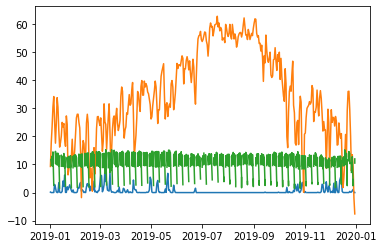

In [93]:
plt.plot(co_mt_df.index, co_mt_df['Snow'] )
plt.plot(co_mt_df.index, co_mt_df['Temp'] )
plt.plot(co_mt_df.index, co_mt_df['Stops Per Hour Worked'] )
plt.show

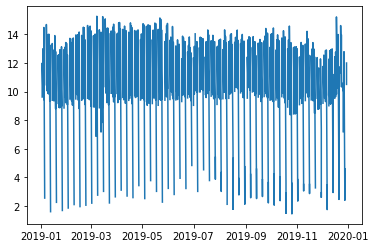

In [134]:
plt.plot(co_mt_df.index, co_mt_df['Stops Per Hour Worked'] )

In [67]:
co_mt_df2 = co_mt_df1.loc[co_mt_df1['DOW'] != "Sunday"]
co_mt_df2 = co_mt_df2.loc[co_mt_df2['Stops Made'] > 0]
dow_groupby = co_mt_df2.groupby(["DOW"])
dow_groupby_comparison = dow_groupby.mean()

dow_groupby_comparison


co_mt_df2_heavysnow = co_mt_df2.loc[co_mt_df2['Snow Day'] == 'Heavy']
h_dow_groupby = co_mt_df2_heavysnow.groupby(["DOW"])
hev_compare = h_dow_groupby.mean()
hev_comparesort =hev_compare.sort_values('DOW#')
hev = hev_comparesort['Stops Per Hour Worked']
co_mt_df2_lightsnow = co_mt_df2.loc[co_mt_df2['Snow Day'] == 'Light']
l_dow_groupby = co_mt_df2_lightsnow.groupby(["DOW"])
lig_compare = l_dow_groupby.mean()
lig_comparesort =lig_compare.sort_values('DOW#')
lig = lig_comparesort['Stops Per Hour Worked']
co_mt_df2_medsnow = co_mt_df2.loc[co_mt_df2['Snow Day'] == 'Med']
m_dow_groupby = co_mt_df2_medsnow.groupby(["DOW"])
med_compare = m_dow_groupby.mean()
med_comparesort =med_compare.sort_values('DOW#')
med = med_comparesort['Stops Per Hour Worked']
co_mt_df2_nonesnow = co_mt_df2.loc[co_mt_df2['Snow Day'] == 'None']
n_dow_groupby = co_mt_df2_nonesnow.groupby(["DOW"])
none_compare = n_dow_groupby.mean()
none_comparesort =none_compare.sort_values('DOW#')
none = none_comparesort['Stops Per Hour Worked']




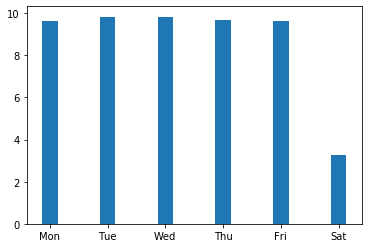

In [68]:
N = 5
ind = np.arange(N)  
width = 0.27 

x_axis = ['Mon','Tue','Wed','Thu','Fri','Sat']

plt.bar(x_axis, none, width=width )


plt.show()

In [84]:
groupby_snow_amount = co_mt_df2.groupby(['Snow Day'])
groupby_snow_amount.mean()
snow_days_count=groupby_snow_amount['Snow'].count()
production_by_snowday=groupby_snow_amount['Stops Per Hour Worked'].mean()
p= pd.DataFrame(production_by_snowday)
p

,Stops Per Hour Worked
Snow Day,
Heavy,7.312807
Light,7.671108
Med,8.681928
None,8.805668


,DOW
Snow Day,
Heavy,5
Med,35
Light,89
None,177


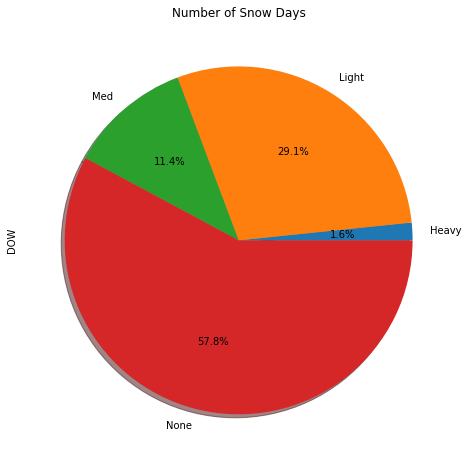

In [121]:
snow_days_count= groupby_snow_amount['DOW'].count()

snow_days_count.plot(kind= 'pie',autopct="%1.1f%%", figsize=(8, 8), shadow=True, rotatelabels=False)


plt.title("Number of Snow Days")
snow_days_count_df = pd.DataFrame(snow_days_count)
snow_days_count_df.sort_values('DOW')


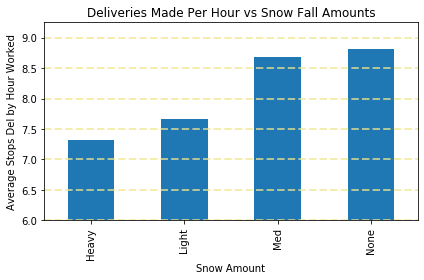

In [71]:

production_chart=production_by_snowday.plot(kind='bar')
production_chart.set_title("Deliveries Made Per Hour vs Snow Fall Amounts")
production_chart.set_xlabel("Snow Amount")
production_chart.set_ylabel("Average Stops Del by Hour Worked")
plt.grid(color='khaki', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.ylim((6,9.25))
plt.tight_layout()

plt.show()

In [129]:
dow_groupby_comparison.sort_values("DOW#")

,Total Hours Worked,Stops Made,Stops Per Hour Worked,Snow,Temp,Precip,DOW#
DOW,,,,,,,
Monday,279.064400,2665.760000,9.514545,0.435140,33.326000,0.058520,0.0
Tuesday,269.995294,2622.156863,9.702536,0.626235,35.401961,0.052137,1.0
Wednesday,265.859804,2556.843137,9.609093,0.866510,35.329412,0.085275,2.0
Thurdsay,264.701000,2509.440000,9.443659,0.795660,34.346000,0.070800,3.0
Friday,266.430192,2520.769231,9.446011,0.831462,34.709615,0.078096,4.0
Saturday,30.248077,99.673077,3.033989,0.562308,34.153846,0.060615,5.0


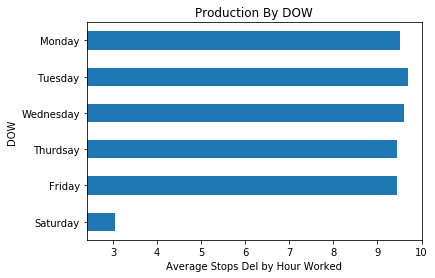

In [81]:


dow_sort = dow_groupby_comparison.sort_values('DOW#',ascending=False)
dow_chart = dow_sort["Stops Per Hour Worked"].plot(kind='barh')
plt.xlim((2.4,10))
plt.title("Production By DOW")
plt.xlabel("Average Stops Del by Hour Worked")
plt.show()


In [65]:
co_mt_df1_dropzero= co_mt_df1.loc[co_mt_df1["Total Hours Worked"] > 0]
co_mt_df1_dropzero

,Mountain Town,Total Hours Worked,Stops Made,Stops Per Hour Worked,Snow,Temp,Snow Depth,Precip,DOW#,DOW,Snow Day
Date,,,,,,,,,,,
2019-01-02,Aspen,287.69,2767,9.617992,0.000,17.8,None,0.000,2,Wednesday,None
2019-01-03,Aspen,302.88,2945,9.723323,0.000,23.4,None,0.000,3,Thurdsay,None
2019-01-04,Aspen,300.13,2829,9.425915,0.000,30.4,None,0.000,4,Friday,None
2019-01-05,Aspen,30.84,79,2.561608,0.024,34.2,None,0.012,5,Saturday,Light
2019-01-07,Aspen,344.51,3609,10.475748,1.831,17.6,None,0.122,0,Monday,Light
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,Aspen,394.82,4076,10.323692,0.421,29.5,None,0.031,1,Tuesday,Light
2019-12-26,Aspen,158.69,1142,7.196421,0.177,7.7,None,0.012,3,Thurdsay,Light
2019-12-27,Aspen,325.62,3212,9.864259,0.650,13.5,None,0.043,4,Friday,Light


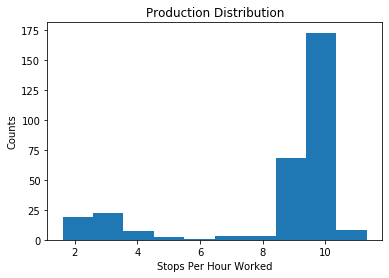

NormaltestResult(statistic=24.223525273370537, pvalue=5.494501809746645e-06)


In [83]:


production_var=co_mt_df1_dropzero['Stops Per Hour Worked']
snow_amount=co_mt_df1_dropzero['Snow']

plt.hist(production_var)
plt.xlabel('Stops Per Hour Worked')
plt.ylabel('Counts')
plt.title("Production Distribution")
plt.show()
print(sts.normaltest(production_var.sample(100)))

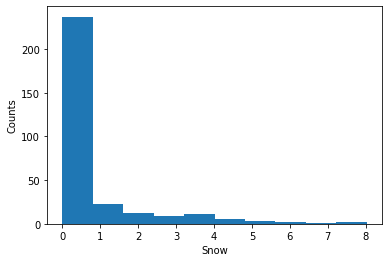

NormaltestResult(statistic=57.38367558341427, pvalue=3.4617298376593075e-13)


In [224]:
plt.hist(snow_amount)
plt.xlabel('Snow')
plt.ylabel('Counts')
plt.show()
print(sts.normaltest(snow_amount.sample(100)))

In [87]:
co_mt_df1_dropsat = co_mt_df1_dropzero[co_mt_df1_dropzero["Total Hours Worked"] > 0]
co_mt_df1_dropsat

,Mountain Town,Total Hours Worked,Stops Made,Stops Per Hour Worked,Snow,Temp,Snow Depth,Precip,DOW#,DOW,Snow Day
Date,,,,,,,,,,,
2019-01-02,Aspen,287.69,2767,9.617992,0.000,17.8,None,0.000,2,Wednesday,None
2019-01-03,Aspen,302.88,2945,9.723323,0.000,23.4,None,0.000,3,Thurdsay,None
2019-01-04,Aspen,300.13,2829,9.425915,0.000,30.4,None,0.000,4,Friday,None
2019-01-05,Aspen,30.84,79,2.561608,0.024,34.2,None,0.012,5,Saturday,Light
2019-01-07,Aspen,344.51,3609,10.475748,1.831,17.6,None,0.122,0,Monday,Light
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,Aspen,394.82,4076,10.323692,0.421,29.5,None,0.031,1,Tuesday,Light
2019-12-26,Aspen,158.69,1142,7.196421,0.177,7.7,None,0.012,3,Thurdsay,Light
2019-12-27,Aspen,325.62,3212,9.864259,0.650,13.5,None,0.043,4,Friday,Light


(array([ 19.,  22.,   7.,   2.,   1.,   3.,   3.,  68., 173.,   8.]),
 array([ 1.61158154,  2.58338348,  3.55518542,  4.52698737,  5.49878931,
         6.47059126,  7.4423932 ,  8.41419515,  9.38599709, 10.35779904,
        11.32960098]),
 <a list of 10 Patch objects>)

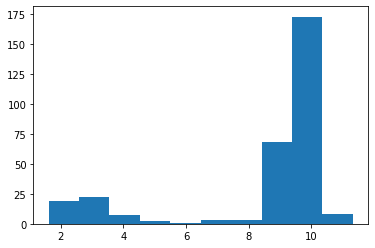

In [89]:
sat_production_var=co_mt_df1_dropzero['Stops Per Hour Worked']
sat_production_var
plt.hist(sat_production_var)

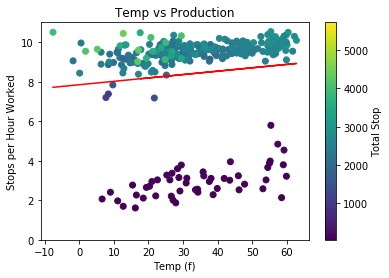

In [150]:
plt.scatter(co_mt_df1_dropsat['Temp'],co_mt_df1_dropsat['Stops Per Hour Worked'],c=co_mt_df1_dropsat['Stops Made'])
plt.ylim((0,11))
x_values = co_mt_df1_dropsat['Temp']
y_values = co_mt_df1_dropsat['Stops Per Hour Worked']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Temp (f)')
plt.ylabel('Stops per Hour Worked')
plt.title("Temp vs Production")
clb = plt.colorbar()
clb.set_label("Total Stop")
plt.show()


In [148]:
quartiles = co_mt_df1_dropsat['Stops Per Hour Worked'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Stops/Hour  is: {lowerq}")
print(f"The upper quartile of Stops/Hour is: {upperq}")
print(f"The interquartile range of Stops/Hour is: {iqr}")
print(f"The the median of Stops/Hour is: {quartiles[0.5]} ")


stats={
    "Lower Quartile":[lowerq],
  "Lower Quartile" :  [upperq],
   "interquartile range": [iqr], 
    "Median": quartiles[0.5]
}
stats1_df = pd.DataFrame(stats)
stats1_df

The lower quartile of Stops/Hour  is: 8.981318868493858
The upper quartile of Stops/Hour is: 9.767887004152918
The interquartile range of Stops/Hour is: 0.7865681356590599
The the median of Stops/Hour is: 9.476315387614274 


,Lower Quartile,interquartile range,Median
0,9.767887,0.786568,9.476315
